In [6]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask
import os
from shapely.geometry import Polygon

In [7]:
from PIL import Image

In [8]:
import shutil

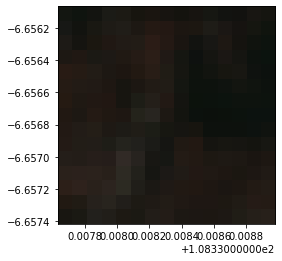

<AxesSubplot:>

In [9]:
rgb = rasterio.open('C:/Users/jwst2/Python/tesis/map/32092200070032.tif') #RGB
show(rgb.read(), transform=rgb.transform)

In [10]:
# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = 0, 0.3
    return ((array - array_min)/(array_max - array_min))

In [11]:
# Read the grid values into numpy arrays
red = rgb.read(1)
green = rgb.read(2)
blue = rgb.read(3)


# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)
stack = np.dstack((redn, greenn, bluen))

new_im = Image.fromarray(np.uint8(stack*255),"RGB")

In [12]:
new_im = new_im.resize((64,64))

In [13]:
new_im.save('C:/Users/jwst2/Python/tesis/map/32092200070032.jpg')

In [7]:

yourpath = "C:/Data/kuliah/Tesis/GGE tesis/images/"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        rgb = rasterio.open(os.path.join(root, name))
        # Read the grid values into numpy arrays
        red = rgb.read(1)
        green = rgb.read(2)
        blue = rgb.read(3)
        # Normalize the bands
        redn = normalize(red)
        greenn = normalize(green)
        bluen = normalize(blue)
        stack = np.dstack((redn, greenn, bluen))
        # Let's see how our color composite looks like
        new_im = Image.fromarray(np.uint8(stack*255),"RGB")
        new_im =new_im.resize((224,224))
        new_im.save("C:/Users/jwst2/Python/tesis/jpg/"+name.replace("tif", "jpg"))


1it [03:42, 222.45s/it]


In [13]:

img = Image.fromarray(stack, 'RGB')
img.save('out.png')


In [18]:
gdf = gpd.read_file("F:/kuliah/Tesis/GGE tesis/Polygon/DESA_32/desa_32.shp")

In [19]:
gdf["iddesa"]  = gdf["kdprov"]+gdf["kdkab"]+gdf["kdkec"]+gdf["kddesa"]

In [20]:
gdf = gdf.set_index("iddesa")

### Cut exact square polygon

In [43]:
rgb = rasterio.open('F:/kuliah/Tesis/GGE tesis/images/Desa Excat Square 10m/3201200009.tif') 

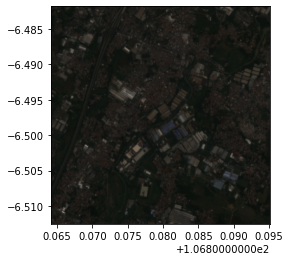

<AxesSubplot:>

In [44]:
show(rgb.read(), transform=rgb.transform)

In [45]:
gdf_sls = gdf.filter(like = "3201200009",axis = 0)

In [46]:
gdf_sls

,kdprov,kdkab,kdkec,kddesa,nmprov,nmkab,nmkec,nmdesa,sumber,periode,geometry
iddesa,,,,,,,,,,,
3201200009,32,01,200,009,JAWA BARAT,BOGOR,CITEUREUP,KARANG ASEM TIMUR,BPS,2019,"POLYGON ((106.88678 -6.49063, 106.88685 -6.490..."


In [47]:
sls = gdf_sls.loc[[gdf_sls.index[0]],'geometry']

<AxesSubplot:>

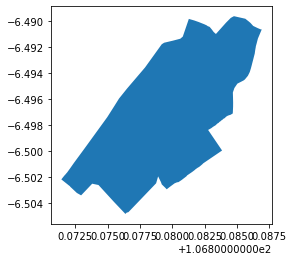

In [48]:
sls.plot()

In [49]:
sls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
bsls = sls.envelope
dx = bsls.bounds.maxx -bsls.bounds.minx 
dy = bsls.bounds.maxy -bsls.bounds.miny
if(dy[0] > dx[0]):
    delta = dy - dx
    deltaad = delta/2
    maxy  = bsls.bounds.maxy
    miny  = bsls.bounds.miny
    maxx = bsls.bounds.maxx+deltaad
    minx = bsls.bounds.minx -deltaad
elif(dy[0] <= dx[0]):
    delta =  dx - dy
    deltaad = delta/2
    maxy  = bsls.bounds.maxy+deltaad
    miny  = bsls.bounds.miny -deltaad
    maxx = bsls.bounds.maxx
    minx = bsls.bounds.minx
    
p = Polygon([(minx[0], miny[0]), (maxx[0], miny[0]), (maxx[0], maxy[0]), (minx[0], maxy[0])])
g = gpd.GeoSeries([p],crs= sls.crs)

<AxesSubplot:>

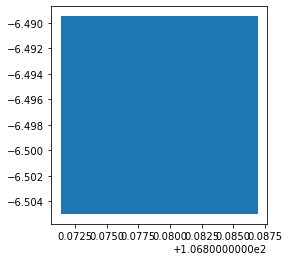

In [51]:
g.plot()

In [52]:
g.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
masked, mask_transform = mask(dataset=rgb,shapes=sls,crop = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


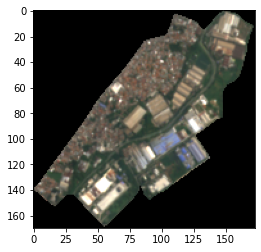

In [54]:
# Read the grid values into numpy arrays

# Normalize the bands
redn = normalize(masked[0])
greenn = normalize(masked[1])
bluen = normalize(masked[2])
stack = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
fig, ax = plt.subplots()
ax.imshow(stack)

In [27]:
masked, mask_transform = mask(dataset=rgb,shapes=,crop = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


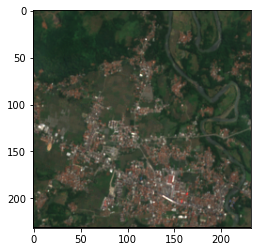

In [28]:
# Read the grid values into numpy arrays

# Normalize the bands
redn = normalize(masked[0])
greenn = normalize(masked[1])
bluen = normalize(masked[2])
stack = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
fig, ax = plt.subplots()
ax.imshow(stack)

In [29]:
masked, mask_transform = mask(dataset=rgb,shapes=g,invert = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


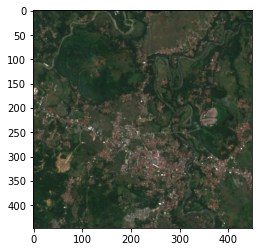

In [30]:
# Read the grid values into numpy arrays

# Normalize the bands
redn = normalize(rgb.read(1))
greenn = normalize(rgb.read(2))
bluen = normalize(rgb.read(3))
stack = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
fig, ax = plt.subplots()
ax.imshow(stack)

In [207]:
rgb.read().shape

(3, 730, 736)

In [11]:
gdf = gpd.read_file("F:/kuliah/Tesis/GGE tesis/Polygon/DESA_32/desa_32.shp")

In [12]:
gdf.set_index("iddesa",inplace = True)

In [71]:
name.replace(".tif", "")

'3207270016'

In [ ]:
yourpath = "F:/kuliah/Tesis/GGE tesis/images/"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        rgb = rasterio.open(os.path.join(root, name))
        gdf_sls = gdf.filter(like = str(name.replace(".tif", "")),axis = 0)
        sls = gdf_sls.loc[[gdf_sls.index[0]],'geometry']
        bsls = sls.envelope
        dx = bsls.bounds.maxx -bsls.bounds.minx 
        dy = bsls.bounds.maxy -bsls.bounds.miny
        if(dy[0] > dx[0]):
            delta = dy - dx
            deltaad = delta/2
            maxy  = bsls.bounds.maxy
            miny  = bsls.bounds.miny
            maxx = bsls.bounds.maxx+deltaad
            minx = bsls.bounds.minx -deltaad
        elif(dy[0] <= dx[0]):
            delta =  dx - dy
            deltaad = delta/2
            maxy  = bsls.bounds.maxy+deltaad
            miny  = bsls.bounds.miny -deltaad
            maxx = bsls.bounds.maxx
            minx = bsls.bounds.minx
        p = Polygon([(minx[0], miny[0]), (maxx[0], miny[0]), (maxx[0], maxy[0]), (minx[0], maxy[0])])
        g = gpd.GeoSeries([p],crs= sls.crs)
        # Read the grid values into numpy arrays
        masked, mask_transform = mask(dataset=rgb,shapes=g,crop = True)
        red = masked[0]
        green = masked[1]
        blue = masked[2]
        # Normalize the bands
        redn = normalize(red)
        greenn = normalize(green)
        bluen = normalize(blue)
        stack = np.dstack((redn, greenn, bluen))
        # Let's see how our color composite looks like
        new_im = Image.fromarray(np.uint8(stack*255),"RGB")
        new_im =new_im.resize((224,224))
        new_im.save("C:/Users/jwst2/Python/tesis/jpg/general desa sentinel sq/"+name.replace("tif", "jpg"))

### Cut Desa True Region

In [ ]:
gdf = gpd.read_file("F:/kuliah/Tesis/GGE tesis/Polygon/DESA_32/desa_32.shp")

In [26]:
yourpath = "C:/Data/kuliah/Tesis/GGE tesis/images/Desa 10m"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        rgb = rasterio.open(os.path.join(root, name))
        gdf_sls = gdf.filter(like = str(name.replace(".tif", "")),axis = 0)
        sls = gdf_sls.loc[[gdf_sls.index[0]],'geometry']
        # Read the grid values into numpy arrays
        masked, mask_transform = mask(dataset=rgb,shapes=sls,crop = True)
        red = masked[0]
        green = masked[1]
        blue = masked[2]
        # Normalize the bands
        redn = normalize(red)
        greenn = normalize(green)
        bluen = normalize(blue)
        stack = np.dstack((redn, greenn, bluen))
        # Let's see how our color composite looks like
        new_im = Image.fromarray(np.uint8(stack*255),"RGB")
        new_im.save("C:/Users/jwst2/Python/tesis/jpg/general desa sentinel 10m tc/"+name.replace("tif", "jpg"))


0it [00:00, ?it/s]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [6]:
gdf_sls = gdf.filter(like = str(name.replace(".tif", "")),axis = 0)

NameError: name 'gdf' is not defined

In [ ]:
 gdf_sls.loc[[gdf_sls.index[0]],'geometry']

#### Cut SLS Data

In [7]:
gdf_01 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3201_2019_1.shp")
gdf_02 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3202_2019_1.shp")
gdf_03 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3203_2019_1.shp")
gdf_04 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3204_2019_1.shp")
gdf_05 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3205_2019_1.shp")
gdf_06 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3206_2019_1.shp")
gdf_07 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3207_2019_1.shp")
gdf_08 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3208_2019_1.shp")
gdf_09 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3209_2019_1.shp")
gdf_10 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3210_2019_1.shp")
gdf_11 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3211_2019_1.shp")
gdf_12 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3212_2019_1.shp")
gdf_13 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3213_2019_1.shp")
gdf_14 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3214_2019_1.shp")
gdf_15 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3215_2019_1.shp")
gdf_16 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3216_2019_1.shp")
gdf_17 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3217_2019_1.shp")
gdf_18 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3218_2019_1.shp")
gdf_71 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3271_2019_1.shp")
gdf_72 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3272_2019_1.shp")
gdf_73 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3273_2019_1.shp")
gdf_74 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3274_2019_1.shp")
gdf_75 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3275_2019_1.shp")
gdf_76 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3276_2019_1.shp")
gdf_77 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3277_2019_1.shp")
gdf_78 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3278_2019_1.shp")
gdf_79 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3279_2019_1.shp")

In [8]:
gdf_01.set_index("idsls",inplace = True)
gdf_02.set_index("idsls",inplace = True)
gdf_03.set_index("idsls",inplace = True)
gdf_04.set_index("idsls",inplace = True)
gdf_05.set_index("idsls",inplace = True)
gdf_06.set_index("idsls",inplace = True)
gdf_07.set_index("idsls",inplace = True)
gdf_08.set_index("idsls",inplace = True)
gdf_09.set_index("idsls",inplace = True)
gdf_10.set_index("idsls",inplace = True)
gdf_11.set_index("idsls",inplace = True)
gdf_12.set_index("idsls",inplace = True)
gdf_13.set_index("idsls",inplace = True)
gdf_14.set_index("idsls",inplace = True)
gdf_15.set_index("idsls",inplace = True)
gdf_16.set_index("idsls",inplace = True)
gdf_17.set_index("idsls",inplace = True)
gdf_18.set_index("idsls",inplace = True)
gdf_71.set_index("idsls",inplace = True)
gdf_72.set_index("idsls",inplace = True)
gdf_73.set_index("idsls",inplace = True)
gdf_74.set_index("idsls",inplace = True)
gdf_75.set_index("idsls",inplace = True)
gdf_76.set_index("idsls",inplace = True)
gdf_77.set_index("idsls",inplace = True)
gdf_78.set_index("idsls",inplace = True)
gdf_79.set_index("idsls",inplace = True)

In [9]:
gdf_01.shape[0]+gdf_02.shape[0]+gdf_03.shape[0]+gdf_04.shape[0]+gdf_05.shape[0]+gdf_06.shape[0]+gdf_07.shape[0]+gdf_08.shape[0]+gdf_09.shape[0]+gdf_10.shape[0]+gdf_11.shape[0]+gdf_12.shape[0]+gdf_13.shape[0]+gdf_14.shape[0]+gdf_15.shape[0]+gdf_16.shape[0]+gdf_17.shape[0]+gdf_18.shape[0]+gdf_71.shape[0]+gdf_72.shape[0]+gdf_73.shape[0]+gdf_74.shape[0]+gdf_75.shape[0]+gdf_76.shape[0]+gdf_77.shape[0]+gdf_78.shape[0]+gdf_79.shape[0]

219937

In [11]:
 gdf_79.shape[0]

1207

In [ ]:
z = 0
yourpath = "F:/kuliah/Tesis/GGE tesis/images/Tesis-Desa-sq-jabar"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        rgb = rasterio.open(os.path.join(root, name))
        if name[0:4] == "3201": 
            gdf_sls = gdf_01.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3202": 
            gdf_sls = gdf_02.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3203": 
            gdf_sls = gdf_03.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3204": 
            gdf_sls = gdf_04.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3205": 
            gdf_sls = gdf_05.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3206": 
            gdf_sls = gdf_06.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3207": 
            gdf_sls = gdf_07.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3208": 
            gdf_sls = gdf_08.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3209": 
            gdf_sls = gdf_09.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3210": 
            gdf_sls = gdf_10.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3211": 
            gdf_sls = gdf_11.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3212": 
            gdf_sls = gdf_12.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3213": 
            gdf_sls = gdf_13.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3214": 
            gdf_sls = gdf_14.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3215": 
            gdf_sls = gdf_15.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3216": 
            gdf_sls = gdf_16.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3217": 
            gdf_sls = gdf_17.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3218": 
            gdf_sls = gdf_18.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3271": 
            gdf_sls = gdf_71.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3272": 
            gdf_sls = gdf_72.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3273": 
            gdf_sls = gdf_73.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3274": 
            gdf_sls = gdf_74.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3275": 
            gdf_sls = gdf_75.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3276": 
            gdf_sls = gdf_76.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3277": 
            gdf_sls = gdf_77.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3278": 
            gdf_sls = gdf_78.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3279": 
            gdf_sls = gdf_79.filter(like = name.replace(".tif", ""),axis = 0)    
        if gdf_sls.shape[0] >0 :
            z = z+gdf_sls.shape[0]
            for i in range(0,(gdf_sls.shape[0])):
                try :
                    sls = gdf_sls.loc[[gdf_sls.index[i]],'geometry']
                    bsls = sls.envelope
                    dx = bsls.bounds.maxx -bsls.bounds.minx 
                    dy = bsls.bounds.maxy -bsls.bounds.miny
                    if(dy[0] > dx[0]):
                        delta = dy - dx
                        deltaad = delta/2
                        maxy  = bsls.bounds.maxy
                        miny  = bsls.bounds.miny
                        maxx = bsls.bounds.maxx+deltaad
                        minx = bsls.bounds.minx -deltaad
                    elif(dy[0] <= dx[0]):
                        delta =  dx - dy
                        deltaad = delta/2
                        maxy  = bsls.bounds.maxy+deltaad
                        miny  = bsls.bounds.miny -deltaad
                        maxx = bsls.bounds.maxx
                        minx = bsls.bounds.minx
                    p = Polygon([(minx[0], miny[0]), (maxx[0], miny[0]), (maxx[0], maxy[0]), (minx[0], maxy[0])])
                    g = gpd.GeoSeries([p],crs= sls.crs)
                    # Read the grid values into numpy arrays
                    masked, mask_transform = mask(dataset=rgb,shapes=g,crop = True)
                    # Normalize the bands
                    redn = normalize(masked[0])
                    greenn = normalize(masked[1])
                    bluen = normalize(masked[2])
                    stack = np.dstack((redn, greenn, bluen))
                    # Let's see how our color composite looks like
                    new_im = Image.fromarray(np.uint8(stack*255),"RGB")
                    new_im =new_im.resize((64,64))
                    new_im.save("C:/Users/jwst2/Python/tesis/jpg/general sls sentinel 30m tc/"+gdf_sls.index[i]+".jpg")
                except Exception:
                    print(gdf_sls.index[i])
                    pass


### ES SPOT SLS

In [10]:
z = 0
yourpath = "F:/kuliah/Tesis/GGE tesis/images/SPOT DESA ES"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        rgb = rasterio.open(os.path.join(root, name))
        if name[0:4] == "3201": 
            gdf_sls = gdf_01.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3202": 
            gdf_sls = gdf_02.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3203": 
            gdf_sls = gdf_03.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3204": 
            gdf_sls = gdf_04.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3205": 
            gdf_sls = gdf_05.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3206": 
            gdf_sls = gdf_06.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3207": 
            gdf_sls = gdf_07.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3208": 
            gdf_sls = gdf_08.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3209": 
            gdf_sls = gdf_09.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3210": 
            gdf_sls = gdf_10.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3211": 
            gdf_sls = gdf_11.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3212": 
            gdf_sls = gdf_12.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3213": 
            gdf_sls = gdf_13.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3214": 
            gdf_sls = gdf_14.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3215": 
            gdf_sls = gdf_15.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3216": 
            gdf_sls = gdf_16.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3217": 
            gdf_sls = gdf_17.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3218": 
            gdf_sls = gdf_18.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3271": 
            gdf_sls = gdf_71.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3272": 
            gdf_sls = gdf_72.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3273": 
            gdf_sls = gdf_73.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3274": 
            gdf_sls = gdf_74.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3275": 
            gdf_sls = gdf_75.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3276": 
            gdf_sls = gdf_76.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3277": 
            gdf_sls = gdf_77.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3278": 
            gdf_sls = gdf_78.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3279": 
            gdf_sls = gdf_79.filter(like = name.replace(".tif", ""),axis = 0)    
        if gdf_sls.shape[0] >0 :
            z = z+gdf_sls.shape[0]
            for i in range(0,(gdf_sls.shape[0])):
                try :
                    sls = gdf_sls.loc[[gdf_sls.index[i]],'geometry']
                    # Read the grid values into numpy arrays
                    masked, mask_transform = mask(dataset=rgb,shapes=sls,crop = True)
                    # Normalize the bands
                    stack = np.dstack(( masked[0],masked[1], masked[2]))
                    # Let's see how our color composite looks like
                    new_im = Image.fromarray(np.uint8(stack),"RGB")
                    new_im.save("C:/Users/jwst2/Python/tesis/jpg/general sls spot tc/"+gdf_sls.index[i]+".jpg")
                except Exception:
                    print(gdf_sls.index[i])
                    pass

1it [48:43, 2923.40s/it]


### TC 30M

In [13]:
z = 0
yourpath = "F:/kuliah/Tesis/GGE tesis/images/Desa 10m"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        rgb = rasterio.open(os.path.join(root, name))
        if name[0:4] == "3201": 
            gdf_sls = gdf_01.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3202": 
            gdf_sls = gdf_02.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3203": 
            gdf_sls = gdf_03.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3204": 
            gdf_sls = gdf_04.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3205": 
            gdf_sls = gdf_05.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3206": 
            gdf_sls = gdf_06.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3207": 
            gdf_sls = gdf_07.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3208": 
            gdf_sls = gdf_08.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3209": 
            gdf_sls = gdf_09.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3210": 
            gdf_sls = gdf_10.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3211": 
            gdf_sls = gdf_11.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3212": 
            gdf_sls = gdf_12.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3213": 
            gdf_sls = gdf_13.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3214": 
            gdf_sls = gdf_14.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3215": 
            gdf_sls = gdf_15.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3216": 
            gdf_sls = gdf_16.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3217": 
            gdf_sls = gdf_17.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3218": 
            gdf_sls = gdf_18.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3271": 
            gdf_sls = gdf_71.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3272": 
            gdf_sls = gdf_72.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3273": 
            gdf_sls = gdf_73.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3274": 
            gdf_sls = gdf_74.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3275": 
            gdf_sls = gdf_75.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3276": 
            gdf_sls = gdf_76.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3277": 
            gdf_sls = gdf_77.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3278": 
            gdf_sls = gdf_78.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3279": 
            gdf_sls = gdf_79.filter(like = name.replace(".tif", ""),axis = 0)    
        if gdf_sls.shape[0] >0 :
            z = z+gdf_sls.shape[0]
            for i in range(0,(gdf_sls.shape[0])):
                try :
                    sls = gdf_sls.loc[[gdf_sls.index[i]],'geometry']
                    masked, mask_transform = mask(dataset=rgb,shapes=sls,crop = True)
                    # Normalize the bands
                    redn = normalize(masked[0])
                    greenn = normalize(masked[1])
                    bluen = normalize(masked[2])
                    stack = np.dstack((redn, greenn, bluen))
                    # Let's see how our color composite looks like
                    new_im = Image.fromarray(np.uint8(stack*255),"RGB")
                    new_im.save("C:/Users/jwst2/Python/tesis/jpg/general sls sentinel 10m tc/"+gdf_sls.index[i]+".jpg")
                except Exception:
                    print(gdf_sls.index[i])
                    pass


0it [00:00, ?it/s]

32072700160014
32092200070031
32092200070032


1it [19:41, 1181.94s/it]


### ES 60M

In [87]:
z = 0
yourpath = "F:/kuliah/Tesis/GGE tesis/images/Tesis-Desa-sq-jabar"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        rgb = rasterio.open(os.path.join(root, name))
        if name[0:4] == "3201": 
            gdf_sls = gdf_01.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3202": 
            gdf_sls = gdf_02.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3203": 
            gdf_sls = gdf_03.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3204": 
            gdf_sls = gdf_04.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3205": 
            gdf_sls = gdf_05.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3206": 
            gdf_sls = gdf_06.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3207": 
            gdf_sls = gdf_07.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3208": 
            gdf_sls = gdf_08.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3209": 
            gdf_sls = gdf_09.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3210": 
            gdf_sls = gdf_10.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3211": 
            gdf_sls = gdf_11.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3212": 
            gdf_sls = gdf_12.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3213": 
            gdf_sls = gdf_13.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3214": 
            gdf_sls = gdf_14.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3215": 
            gdf_sls = gdf_15.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3216": 
            gdf_sls = gdf_16.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3217": 
            gdf_sls = gdf_17.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3218": 
            gdf_sls = gdf_18.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3271": 
            gdf_sls = gdf_71.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3272": 
            gdf_sls = gdf_72.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3273": 
            gdf_sls = gdf_73.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3274": 
            gdf_sls = gdf_74.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3275": 
            gdf_sls = gdf_75.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3276": 
            gdf_sls = gdf_76.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3277": 
            gdf_sls = gdf_77.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3278": 
            gdf_sls = gdf_78.filter(like = name.replace(".tif", ""),axis = 0)
        elif name[0:4] == "3279": 
            gdf_sls = gdf_79.filter(like = name.replace(".tif", ""),axis = 0)    
        if gdf_sls.shape[0] >0 :
            z = z+gdf_sls.shape[0]
            for i in range(0,(gdf_sls.shape[0])):
                try :
                    sls = gdf_sls.loc[[gdf_sls.index[i]],'geometry']
                    bsls = sls.envelope
                    dx = bsls.bounds.maxx -bsls.bounds.minx 
                    dy = bsls.bounds.maxy -bsls.bounds.miny
                    if(dy[0] > dx[0]):
                        delta = dy - dx
                        deltaad = delta/2
                        maxy  = bsls.bounds.maxy
                        miny  = bsls.bounds.miny
                        maxx = bsls.bounds.maxx+deltaad
                        minx = bsls.bounds.minx -deltaad
                    elif(dy[0] <= dx[0]):
                        delta =  dx - dy
                        deltaad = delta/2
                        maxy  = bsls.bounds.maxy+deltaad
                        miny  = bsls.bounds.miny -deltaad
                        maxx = bsls.bounds.maxx
                        minx = bsls.bounds.minx
                    p = Polygon([(minx[0], miny[0]), (maxx[0], miny[0]), (maxx[0], maxy[0]), (minx[0], maxy[0])])
                    g = gpd.GeoSeries([p],crs= sls.crs)
                    # Read the grid values into numpy arrays
                    masked, mask_transform = mask(dataset=rgb,shapes=g,crop = True)
                    redn = normalize(masked[0])
                    greenn = normalize(masked[1])
                    bluen = normalize(masked[2])
                    stack = np.dstack((redn, greenn, bluen))
                    # Let's see how our color composite looks like
                    new_im = Image.fromarray(np.uint8(stack*255),"RGB")
                    new_im.save("C:/Users/jwst2/Python/tesis/jpg/general sls sentinal 60m ES/"+gdf_sls.index[i]+".jpg")
                except Exception:
                    print(gdf_sls.index[i])
                    pass

0it [00:00, ?it/s]

32051000011002
32051000011001
32072700160014
32092200070031
32092200070032


1it [27:29, 1649.50s/it]


In [109]:
rgb

<closed DatasetReader name='C:/Data/kuliah/Tesis/GGE tesis/images/Desa 10m/3207270016.tif' mode='r'>

In [68]:
gdf_sls.shape[0] >0

False

In [281]:
fig.savefig('plot_name.png', dpi = 300)

In [282]:
from PIL import Image
im = Image.fromarray(np.uint8(stack*255))
im.save('test.jpg')

In [107]:
rgb.

<closed DatasetReader name='C:/Data/kuliah/Tesis/GGE tesis/images/Desa 10m/3207270016.tif' mode='r'>

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


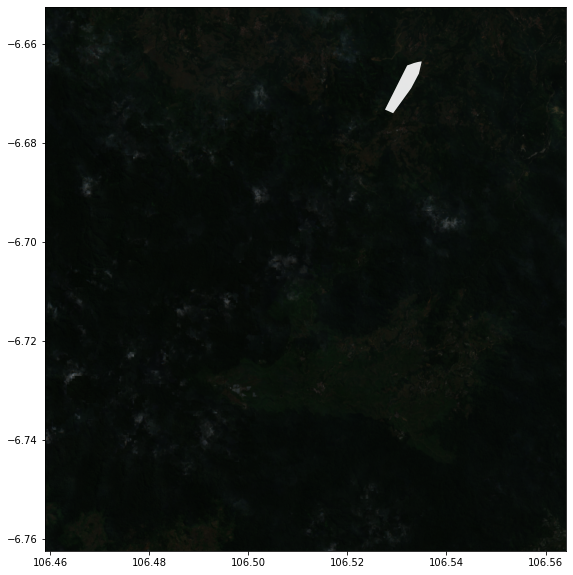

In [56]:
fig, ax = plt.subplots(figsize=(12, 10))
show(rgb.read(), transform=rgb.transform, ax=ax)
sls.plot(ax=ax, color='white', alpha=.9) ## alpha is the transparency setting
plt.show()

### SPOT CUT

In [5]:
from osgeo import gdal
import rasterio
from rasterio.merge import merge
from rasterio.plot import show

In [6]:
countries_gdf = gpd.read_file("F:/kuliah/Tesis/GGE tesis/images/SPOT 67/data_grid_jabar.gpkg")

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [7]:
maplist = countries_gdf.idkab.unique()

In [8]:
polylist = countries_gdf[countries_gdf.idkab == maplist[0]]

In [9]:
polylist.ID_GRID[0]

'ID-1661'

In [10]:
preffix = "patched_"
suffix = ".tif"
pathspot = "F:/kuliah/Tesis/GGE tesis/images/SPOT 67/"

In [11]:
for j in maplist:
    polylist = countries_gdf[countries_gdf.idkab == j]
    files_to_mosaic = pathspot + preffix +polylist.ID_GRID +suffix
    print(j)
    src_files_to_mosaic = []
    for fp in files_to_mosaic.to_list():
        src = rasterio.open(fp)
        src_files_to_mosaic.append(src)
    # Copy the metadata
    mosaic, out_trans = merge(src_files_to_mosaic)
    out_meta = src.meta.copy()
    # Update the metadata
    out_meta.update({"driver": "GTiff",
                     "height": mosaic.shape[1],
                   "width": mosaic.shape[2],
                 "transform": out_trans,
                    "crs": "+proj=utm +zone=35 +ellps=GRS80 +units=m +no_defs "
                   }
                   )
    with rasterio.open("F:/kuliah/Tesis/GGE tesis/images/spot_"+j+".tif", "w", **out_meta) as dest:
       dest.write(mosaic)

3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3271
3272
3273
3274
3275
3276
3277
3278
3279


In [38]:
maplist

array(['3201', '3202', '3203', '3204', '3205', '3206', '3207', '3208',
       '3209', '3210', '3211', '3212', '3213', '3214', '3215', '3216',
       '3217', '3218', '3271', '3272', '3273', '3274', '3275', '3276',
       '3277', '3278', '3279'], dtype=object)

In [12]:
gdf = gpd.read_file("F:/kuliah/Tesis/GGE tesis/Polygon/DESA_32/desa_32.shp")

In [18]:
gdf["idkab"] = gdf["kdprov"] +gdf["kdkab"]

In [42]:
gdf = gdf.set_index("iddesa")

In [26]:
prefix = "spot_"
suffix = ".tif"
yourpath = "F:/kuliah/Tesis/GGE tesis/images/SPOT KOTA/"

In [ ]:
for i in maplist:
    rgb = rasterio.open(yourpath+prefix+i+suffix)
    gdf_kab = gdf[gdf['idkab'].str.contains(i)]
    for j in range(0,(gdf_kab.shape[0])):
        try :
           # print(gdf_kab.index[j])
            desa = gdf_kab.loc[[gdf_kab.index[j]],'geometry']
            desa.to_crs(rgb.crs)
            masked, mask_transform = mask(dataset=rgb,shapes=desa,crop = True)
            # Normalize the bands
            out_meta = rgb.meta.copy()
            # Update the metadata
            out_meta.update({"driver": "GTiff",
                    "height": masked.shape[1],
                    "width": masked.shape[2],
                    "transform": mask_transform,
                    "crs": desa.crs
                       }
                       )
            #show(masked)
            savepath = "F:/kuliah/Tesis/GGE tesis/images/SPOT DESA/"+gdf_kab.index[j]+".tif"
            with rasterio.open(savepath, "w", **out_meta) as dest:
                dest.write(masked)
        except Exception:
            print(gdf_kab.index[j])
            pass


In [ ]:
for i in maplist:
    rgb = rasterio.open(yourpath+prefix+i+suffix)
    gdf_kab = gdf[gdf['idkab'].str.contains(i)]
    for j in range(0,(gdf_kab.shape[0])):
        try :
            # print(gdf_kab.index[j])
            desa = gdf_kab.loc[[gdf_kab.index[j]],'geometry']
            desa.to_crs(rgb.crs)
            bsls = desa.envelope
            dx = bsls.bounds.maxx -bsls.bounds.minx 
            dy = bsls.bounds.maxy -bsls.bounds.miny
            if(dy[0] > dx[0]):
                delta = dy - dx
                deltaad = delta/2
                maxy  = bsls.bounds.maxy
                miny  = bsls.bounds.miny
                maxx = bsls.bounds.maxx+deltaad
                minx = bsls.bounds.minx -deltaad
            elif(dy[0] <= dx[0]):
                delta =  dx - dy
                deltaad = delta/2
                maxy = bsls.bounds.maxy+deltaad
                miny = bsls.bounds.miny -deltaad
                maxx = bsls.bounds.maxx
                minx = bsls.bounds.minx
            p = Polygon([(minx[0], miny[0]), (maxx[0], miny[0]), (maxx[0], maxy[0]), (minx[0], maxy[0])])
            g = gpd.GeoSeries([p],crs= desa.crs)
            masked, mask_transform = mask(dataset=rgb,shapes=g,crop = True)
            # Normalize the bands
            out_meta = rgb.meta.copy()
            # Update the metadata
            out_meta.update({"driver": "GTiff",
                    "height": masked.shape[1],
                    "width": masked.shape[2],
                    "transform": mask_transform,
                    "crs": desa.crs
                       }
                       )
            #show(masked)
            savepath = "F:/kuliah/Tesis/GGE tesis/images/SPOT DESA ES/"+gdf_kab.index[j]+".tif"
            with rasterio.open(savepath, "w", **out_meta) as dest:
                dest.write(masked)
        except Exception:
            print(gdf_kab.index[j])
            pass


In [44]:
rgb.crs

CRS.from_wkt('PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_GRS80_ellipsoid",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [35]:
print("F:/kuliah/Tesis/GGE tesis/images/SPOT DESA/"+gdf_kab.loc[[gdf_kab.index[j]],'iddesa']+".tif")

0    F:/kuliah/Tesis/GGE tesis/images/SPOT DESA/320...
Name: iddesa, dtype: object


In [40]:
gdf_kab.loc[[gdf_kab.index[j]],'iddesa']

'0    3201010001\nName: iddesa, dtype: object'

#### DESA SPOT ES

In [ ]:
yourpath = "F:/kuliah/Tesis/GGE tesis/images/SPOT DESA EC UNCOVERED"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            rgb = rasterio.open(os.path.join(root, name))
            red = rgb.read(1)
            green = rgb.read(2)
            blue = rgb.read(3)
            stack = np.dstack((red, green, blue))
            new_im = Image.fromarray(np.uint8(stack),"RGB")
            new_im =new_im.resize((224,224))
            new_im.save("C:/Users/jwst2/Python/tesis/jpg/general desa spot ES/"+name.replace("tif", "jpg"))
        except Exception:
            print(name)
            pass

0it [00:00, ?it/s]

In [102]:
rgb = rasterio.open(os.path.join(root, name))
red = rgb.read(1)
green = rgb.read(2)
blue = rgb.read(3)
stack = np.dstack((red, green, blue))

new_im = Image.fromarray(np.uint8(stack),"RGB")

In [ ]:
files

In [ ]:
path = "C:/Users/jwst2/Python/tesis/jpg/general sls spot ES RES/"
import os
import glob
# Get a list of all the file paths that ends with .txt from in specified directory
for desa in split.iddesa:
    desa = str(desa)
    fileList = glob.glob("C:/Users/jwst2/Python/tesis/jpg/general sls spot ES/"+desa+"*")
    # Iterate over the list of filepaths & remove each file.
    for filePath in fileList:
        try:
            shutil.copy(filePath, path+filePath[-18:])
        except:
            print("Error while deleting file : ", filePath)

In [83]:
path = "C:/Users/jwst2/Python/tesis/jpg/general sls sentinel 10m ES RES/"
import os
import glob
# Get a list of all the file paths that ends with .txt from in specified directory
for desa in split.iddesa:
    desa = str(desa)
    fileList = glob.glob("C:/Users/jwst2/Python/tesis/jpg/general sls sentinel 10m ES/"+desa+"*")
    # Iterate over the list of filepaths & remove each file.
    for filePath in fileList:
        try:
            shutil.copy(filePath, path+filePath[-18:])
        except:
            print("Error while deleting file : ", filePath)

In [7]:
from tqdm import tqdm

In [14]:
yourpath = "F:/kuliah/Tesis/GGE tesis/images/Desa 10m"
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try:
            rgb = rasterio.open(os.path.join(root, name))
            gdf_desa = gdf.filter(like = str(name.replace(".tif", "")),axis = 0)
            # Read the grid values into numpy arrays
            masked, mask_transform = mask(dataset=rgb,shapes=gdf_desa.geometry.envelope,crop = True)
            red = masked[0]
            green = masked[1]
            blue = masked[2]
            # Normalize the bands
            redn = normalize(red)
            greenn = normalize(green)
            bluen = normalize(blue)
            stack = np.dstack((redn, greenn, bluen))
            # Let's see how our color composite looks like
            new_im = Image.fromarray(np.uint8(stack*255),"RGB")
            new_im.save("C:/Users/jwst2/Python/tesis/jpg/general desa sentinel 10m bound/"+name.replace("tif", "jpg"))
        except:
            print("Error while deleting file : ", name)


1it [03:14, 194.88s/it]
